# Creating image masks

When peaks are detected and band shapes fitted properly, each diffraction order now has a vector of coordinates,
corresponding to its center. 
However, the band has certain width, and it's convenient to define a mask for our image using `numpy`.

`echelle.py` uses an array of masks. Each mask shows only one diffraction order.

## imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Load image and pattern

In [3]:
image = np.loadtxt('pattern_image_synthetic.txt')
pattern = np.loadtxt('pattern.txt')

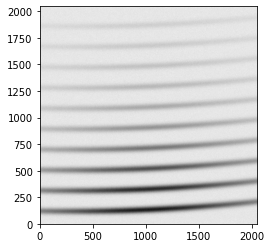

In [4]:
# Show image in log scale
# plt.imshow(image, origin="lower", cmap="binary",
#            norm=mpl.colors.LogNorm(image.min(), image.max()*1))
# Show image
plt.imshow(image, origin="lower", cmap="binary")

In [5]:
n_ord = image.shape[0]  # number of orders (first array dimension)
n_wav = image.shape[1]  # number of wavelengths (second array dimension)
dv = 8
def make_mask(ordind, show=False, **kws):
        """Converts linear coordinates into 2D mask for image masking"""
        dv = kws.get("dv", 8)

        l = pattern[:, ordind]
        cc = np.arange(-dv, dv + 1, 1)
        ii = ((np.zeros([n_wav, 1]) + cc).T + l).flatten()

        jj = np.repeat(np.arange(n_wav)[np.newaxis, ...], dv * 2 + 1, axis=0,).flatten()

        mask = (ii.astype(int, copy=False), jj.astype(int, copy=False))
        if not show:
            return mask
        else:
            pp = np.zeros((n_wav, n_ord), dtype=bool)
            pp[mask] = True
            return pp
        
cutting_masks = [make_mask(i, dv=dv) for i in range(pattern.shape[1])]

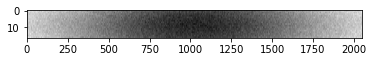

In [6]:
order_images = [image[m].reshape(dv * 2 + 1, n_wav) for m in cutting_masks]
plt.imshow(order_images[0], aspect=10, cmap='binary')

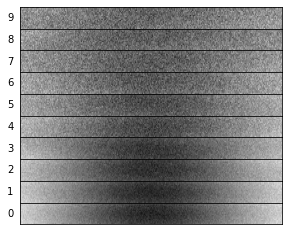

In [15]:
fig, axs = plt.subplots(pattern.shape[1], 1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.0, hspace=0.0)
for ax in axs[:-1]:
    ax.set_xticks([])
    ax.set_yticks([])

for o, ax in enumerate(reversed(axs)):
    ax.imshow(order_images[o], aspect=10, cmap='binary')
    ax.set_xlim([0, n_wav])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.axis('off')
    ax.text(-0.05, 0.5, o, transform=ax.transAxes, color="k",
            va="center", ha="left")

# P.S.
In `echelle.py` cutting masks are implemented, all we need to supply is the `pattern.txt` file for the `calibration` class. 

The `read_image` method of `echelle.py` needs to be updated to be independent of image file format. Specify what parameters from the image are used in `echelle.py`, make a method to read image data and image parameters outside of the class. Probably make a separate `python` file with read methods.